<a href="https://colab.research.google.com/github/dani1974/DanielaRosasPUC/blob/main/Sprint2_MVP2_Daniela_Rosasipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPRINT 2 - MVP 2 - Modelo baseado em Deep Learning para resolver um problema de visão computacional**
#####**ALUNA - DANIELA ROSAS**

###**1. Definição do Problema**

  1.1. **Qual é a descrição do problema?**
  ##### Modelo para treinar de 2048 imagens de raças de cachorro por visão computacional usando Redes Neurais Convolucionais (CNN) mais transfer learning, com objtetivo em classificar as raças de 10 dessas imagens.

  1.2.   **Você tem premissas ou hipóteses sobre o problema? Quais?**
  #####  As premissas de modelos de redes neurais convolucionais para visão computacional incluem a utilização de camadas convolucionais para extrair características das imagens e reduzir a dimensionalidade dos dados, seguida por camadas densamente conectadas para classificação¹.

  1.3. **Que restrições ou condições foram impostas para selecionar os dados?**
  ##### criar um dicionario para fazer o mapeamento dos codigos com a as raças

  1.4.   **Descreva o seu dataset (atributos, imagens, anotações, etc).**

##### a saida resnet50 (Functional)  com 2048 mini imagens que são os atributosou com as caracteristicas extraidas, o 7 x 7 trem que fazer uma média que é o global_average_pooling2d com 2048 numeros que em seguida que alimentou no classificador achatando para metade em 1024, tendo no final as 10 saidas

##### Imagewoof  = 9000 imagens para treino e 4000 para teste das raças: Australian terrier, Border terrier, Samoyed, Beagle, Shih-Tzu, Foxhound inglês, Rhodesian ridgeback, Dingo, Golden retriever, Old English sheepdog.

##### O conjunto de dados TGz com 1%, 5%, 25% e 50% dos rótulos alterados aleatoriamente para um rótulo incorreto.

##### O conjunto de validação é o mesmo que Imagewoof (ou seja, 30% das imagens Imagewoof); não há imagens Imagenette no conjunto de validação (estão todas no conjunto de treinamento)

##### Apenas 10% das imagens Imagewoof estão no conjunto de treinamento

#####  https://github.com/fastai/imagenette#readme


In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz # baixando as imagens

--2023-07-16 20:26:04--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.202.248, 52.216.146.85, 52.217.120.208, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.202.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz.1’

imagewoof2.tgz.1    100%[===================>]   1.25G  37.3MB/s    in 34s     

2023-07-16 20:26:38 (37.7 MB/s) - ‘imagewoof2.tgz.1’ saved [1343715595/1343715595]



**Extraindo arquivo tgz**

**Importando a Biblioteca para extrair arquivo TGZ para imagens em JPG**

Existe 1 pasta para treinamento, 1 para teste, dentro de cada contendo uma pasta para cada classes ou imagens com raças de cachorros.

In [2]:
!tar zxvf imagewoof2.tgz

A saída de streaming foi truncada nas últimas 5000 linhas.
imagewoof2/train/n02115641/n02115641_9529.JPEG
imagewoof2/train/n02115641/n02115641_12039.JPEG
imagewoof2/train/n02115641/n02115641_8768.JPEG
imagewoof2/train/n02115641/n02115641_7188.JPEG
imagewoof2/train/n02115641/n02115641_6633.JPEG
imagewoof2/train/n02115641/n02115641_25018.JPEG
imagewoof2/train/n02115641/n02115641_10706.JPEG
imagewoof2/train/n02115641/n02115641_11814.JPEG
imagewoof2/train/n02115641/n02115641_51135.JPEG
imagewoof2/train/n02115641/n02115641_7409.JPEG
imagewoof2/train/n02115641/n02115641_29257.JPEG
imagewoof2/train/n02115641/n02115641_17997.JPEG
imagewoof2/train/n02115641/n02115641_6473.JPEG
imagewoof2/train/n02115641/n02115641_2963.JPEG
imagewoof2/train/n02115641/n02115641_52488.JPEG
imagewoof2/train/n02115641/n02115641_6536.JPEG
imagewoof2/train/n02115641/n02115641_6166.JPEG
imagewoof2/train/n02115641/n02115641_21519.JPEG
imagewoof2/train/n02115641/n02115641_504.JPEG
imagewoof2/train/n02115641/n02115641_140

**Visualizando o arquivo utilizando a biblioteca glob e usar todoas os caminhos da pasta principal**

In [3]:
import glob

In [4]:
all_train_paths = glob.glob('/content/imagewoof2/train/*/*.JPEG') # nomeando o treinamento com esse caminho das imagens de treino

In [5]:
import random # biblioteca para selecionar um desses caminhos e visualizar
from PIL import Image # biblioteca para carregar a imagem a partir de um camimho

/content/imagewoof2/train/n02111889/n02111889_7818.JPEG


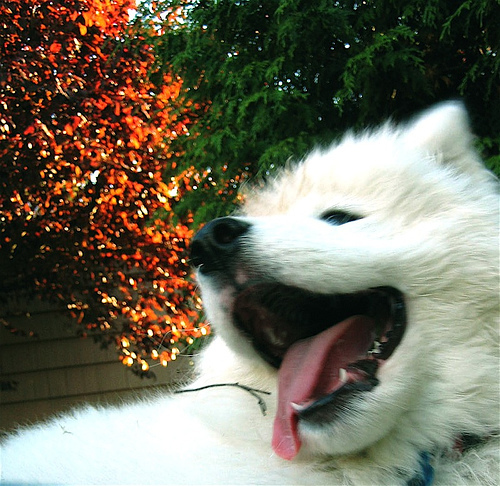

In [6]:
img_path = random.choice(all_train_paths) #Escolhendo aleatoriamento uma imagem
print(img_path) # printar o caminho junto com a imagem
Image.open(img_path) # carregar a imagem

In [7]:
len(all_train_paths) # tamanho do treino

9025

### **Carregamento das imagens no Keras- ImageDataGenerator**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # biblioteca para fazer o carregamento
from tensorflow.keras.applications.resnet50 import preprocess_input # modelo o metodo preprocess_input de rede pre treinada resnet50

**Todos os modelos pré-treinados esperam imagens tenham a mesma normalização**

As imagens devem ser carregadas em um intervalo de [0, 1] e depois normalizadas usando e mean = [0.485, 0.456, 0.406]" std = [0.229, 0.224, 0.225].

In [9]:
# iniciar a classe com nome de datagen
datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # função para carregar e normalizar a imagem como os mesmos parametros da rede pre treinada

In [10]:
# Métodos para fazer o carregamento as imagens de treino e teste a partir de um caminho

train_gen = datagen.flow_from_directory('/content/imagewoof2/train', # gerador para carregar as imagens de treino
                            target_size=(224, 224), # tamanho da imagem
                            class_mode='sparse') # prever na saida as ID para cada uma das classes

valid_gen = datagen.flow_from_directory('/content/imagewoof2/val',  # gerador para carregar as imagens de teste ou validação
                            class_mode='sparse') # prever na saida as ID para cada uma das classes

Found 9025 images belonging to 10 classes.
Found 3929 images belonging to 10 classes.


## **2.	Modelagem e treinamento:**

**2.1.	Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas**

Foi utilizado o modelo ResNet50

**2.2.	Há algum ajuste inicial para os hiperparâmetros?**

Foi utilizado o modelo ResNet50, no topo para fazer a extração de atributos, em seguindo foi colocado um classificador para sder treinado para fazera a classificação desses atributos destre as 10 raças difererentes

**2.3.	O modelo foi devidamente treinado? Foi observado problema de underfitting?**

foi treinando com apenas 3 epocas conseguindo uma acuracia de  validação de 94%, foi escolhido 3 epocas devido ao custo computacional.

**2.4.	É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.**

**2.5.	Há algum método avançado ou mais complexo que possa ser avaliado?**
Estrategia utilizadas de boas praticas para um bom treinameto :





**Declarando o modelo:**

Através de uma super rede neural pré treinada, vou extrair somente a parte de extração de atributos, parte convolucional, para depois fazer a classificação dentre 10 cachorros diferentes

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50 # super rede ResNet50

In [12]:
# carregar somente a parte convolucional da rede

base_model = ResNet50(include_top=False, input_shape=(224, 224, 3)) # qual a parte do codigo e dimensão dessa imagens que estou pegando compativel com essa rede neural

**Colocando 1 camada densamente conectada + 1 camada para fazer a classificação em digitos**

In [13]:
from tensorflow.keras.models import Sequential # carregando a api para construção do modelo usando o Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D # importando as camadas densamente conectadas e a GlobalAveragePooling2D para achatar as imagens

In [14]:
# Fazendo um for nas camadas do modelo pré treinado para congelar os pesos

for layer in base_model.layers:
    layer.trainable=False

In [15]:
# Declarando o modelo e suas camadas

model = Sequential([base_model, # camada convolucional
                    GlobalAveragePooling2D(), # camada para achatar as imagens
                    Dense(1024, activation='relu'),# camada oculta densamente conectada para diminuir 1/2 a imagen original , usando a função de ativação RELU para cortar a parte positiva
                    Dense(10, activation='softmax')]) # camada de saida densamente conectada com 10 classes,  usando a função de ativação softmax
                    #foi usado a função de ativação softmax devido as multiplas saidas e para retornar as probabilidades de cada uma das 10 saidas

**Visualizando o modelo até o momento:**

 saida resnet50 (Functional)  com 2048 mini imagens que são os atributosou com as caracteristicas extraidas, o 7 x 7 trem que fazer uma média que é o global_average_pooling2d com 2048 numeros que em seguida que alimentou no classificador achatando para metade em 1024, tendo no final as 10 saidas

In [16]:
model.summary() # Visualizando o modelo até o momento

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 25,696,138
Trainable params: 2,108,426
Non-trainable params: 23,587,712
_________________________________________________________________


## **Treinar o modelo**

**1º) compilar o modelo entrando com a função de custo e o otimizador.**


In [17]:
from tensorflow.keras.optimizers import Adam # importando o otimizador Adam

In [18]:
# compilando o modelo com seus respectivos parâmetros
model.compile(optimizer=Adam(learning_rate=1e-4), # taxa de aprendizado pardrão 10^-4
              loss='sparse_categorical_crossentropy', # função de custo compativel com essas saidas 'sparse'
              metrics=['accuracy']) # metrica para medir o desempenho do modelo de classificação

**2º) Treinar o modelo de 2048 imagens para classificar 10 imagens**

Vamos olhar a função de custo(loss treino e teste) e a acuracia do modelo (accuracy(treino e teste)

In [19]:
model.fit(train_gen, # gerador de treino
          validation_data=valid_gen, # gerador do teste para saber do desempenho do conjunto de teste
          epochs=3) # numero de épocas


Epoch 1/3
283/283 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8917

KeyboardInterrupt: ignored

**O modelo mostrou que na 3ª época atingiu uma acuracia de 94% de acerto para o conjunto de treino**

## **Visualizando algumas Predições do conjunto de teste**

In [38]:
import numpy as np
import matplotlib.pyplot as plt

**O problema aqui é que temos as classes com os numeros de id , mas não sabemos a raça que corresponde**

**1) Inserir o Dicionário de dados correspondendte as raças**

In [40]:
lbl_dict = dict(
  n02086240= 'Shih-Tzu',
  n02087394= 'Rhodesian ridgeback',
  n02088364= 'Beagle',
  n02089973= 'English foxhound',
  n02093754= 'Australian terrier',
  n02096294= 'Border terrier',
  n02099601= 'Golden retriever',
  n02105641= 'Old English sheepdog',
  n02111889= 'Samoyed',
  n02115641= 'Dingo'
)

In [44]:
# visualizando uma imagem no conjunto de teste
img= Image.open('/content/imagewoof2/val/n02093754/ILSVRC2012_val_00000832.JPEG')

**2) Colocar essa imagem dentre de dimensões que sejam compativeis com o mdoelo e também vou precisar pre processar essa imagem**

In [46]:
img=img.resize((224, 224)) # redimensionar altura e largura

In [48]:
img_np=np.array(img) # convertendo a imagem para numpy - são os pixes dos 3 canais

In [50]:
img_np.shape # para ver a dimensão dos canais

(224, 224, 3)

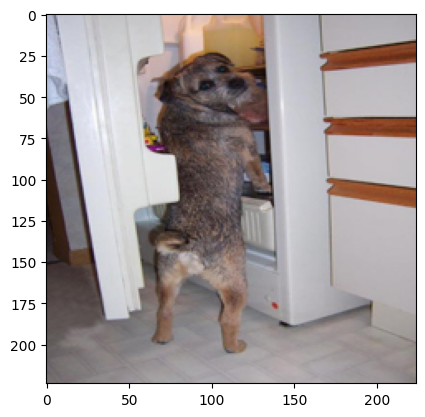

In [49]:
plt.imshow(img_np)

In [51]:
img_np=preprocess_input(img_np) # aplicar a mesma função de pre processamento que foi aplicado nas imagens de treinamento 'preprocess_input' que vai normalizar a imagem com a media e DP do imagenet

## **Pré processar a imagem, para facilitar a extração das caracteristicas**

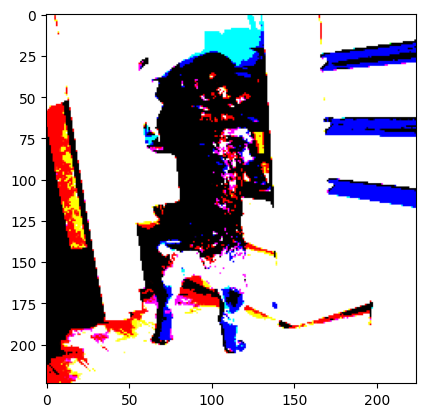

In [52]:
plt.imshow(img_np)

## **Redimensionar o bath o lote do tamanho das imagens**

In [54]:
img_np[None].shape # adicionando uma nova dimensão

(1, 224, 224, 3)

In [55]:
img_np=img_np.reshape(1, 224, 224, 3)# adicionando uma nova dimensão

## **Prevendo qual a probabilidade para cada uma das 10 classes de raças de cachorro**



In [56]:
result=model.predict(img_np) # resultado do modelo com as probabilidades

1/1 [==============================] - 1s 923ms/step


In [59]:
id_max = result[0].argmax() # probabilidade do modelo de 1 item e pegar o id quie tenha a maior prob
id_max

4

In [60]:
train_gen.class_indices.items() # itens com todas classes para pegar os valores desses indices

dict_items([('n02086240', 0), ('n02087394', 1), ('n02088364', 2), ('n02089973', 3), ('n02093754', 4), ('n02096294', 5), ('n02099601', 6), ('n02105641', 7), ('n02111889', 8), ('n02115641', 9)])

In [61]:
index_to_class = {v: k for k, v in train_gen.class_indices.items()} # criando um dicionario mapeando seu indice para sua classe

In [63]:
index_to_class # visualizando

{0: 'n02086240',
 1: 'n02087394',
 2: 'n02088364',
 3: 'n02089973',
 4: 'n02093754',
 5: 'n02096294',
 6: 'n02099601',
 7: 'n02105641',
 8: 'n02111889',
 9: 'n02115641'}

## **Vendo de fato qual é a raça ou classe que a rede previu**

In [64]:
index_class=index_to_class[id_max]
lbl_dict[index_class]

'Australian terrier'

## **3. Verificando o desempenho do modelo**

**3.1 	Selecione as métricas de avaliação condizentes com o problema, justificando.**

**3.2 Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.**

**3.3 Os resultados fazem sentido?**
Sim,

**3.4 	Foi observado algum problema de overfitting?**


**3.6 	Descreva a melhor solução encontrada, justificando**


## **Visualizando algumas Predições uma imagem da internet**

Vou buscar uma imagem de Dingo da internet

In [ ]:
!wget 'https://conexaoplaneta.com.br/wp-content/uploads/2019/11/filhote-vira-lata-achado-australia-era-dingo-especie-ameacada-extincao-conexao-planeta.jpg'

In [15]:
img=Image.open('filhote-vira-lata-achado-australia-era-dingo-especie-ameacada-extincao-conexao-planeta.jpg')
img

NameError: ignored

In [ ]:
img=img.resize((224, 224)) # redimensionar
img_np=np.array(img) # converte para array do numpy
img_np=preprocess_input(img_np) # faz o preprocessamento da inmagem
img_np=img_np[None] # adiciona uma nova dimensão

result=model.predict(img_np) # resultado do modelo de proedição
id_max = result[0].argmax() # classe com maior probabilidade que ele previu
proba = result[0][id_max] # probabilidade
index_class=index_to_class[id_max] # ID coim maior probabilidade da classe que previu
lbl_dict[index_class] # dicionario que faz o mapeamento classe x ID

In [ ]:
proba # probalilidade de confiança que é dessa classe